In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from time import sleep
from scipy.stats import linregress
from pprint import pprint
import csv
import scipy.stats as st

In [2]:
# Study data files
suicide_path = "../../data/Suicide.csv"
depression_path = "../../data/Adults_depression_S.csv"

In [3]:
# Read the data
suicide = pd.read_csv(suicide_path)

# Display the data table for preview
suicide.head()

,YEAR,STATE,RATE,DEATHS
0,2020,AL,16.0,793
1,2020,AK,27.5,204
2,2020,AZ,17.6,1363
3,2020,AR,19.0,583
4,2020,CA,10.0,4144


In [4]:
# Read the data
depression = pd.read_csv(depression_path)

# Display the data table for preview
depression.head()

,Year,StateAbbr,State,Depression rate
0,2018,AL,Alabama,24.0
1,2018,AK,Alaska,20.2
2,2018,AZ,Arizona,16.7
3,2018,AR,Arkansas,22.5
4,2018,CA,California,15.4


In [5]:
# Filter the DataFrame down only to those columns to chart
suicide_clean = suicide.loc[suicide['YEAR']==2020]
suicide_clean = suicide_clean[["STATE","RATE"]].set_index("STATE")
suicide_clean = suicide_clean.rename(columns={'RATE':'Suicide rate'})
suicide_clean.head()

,Suicide rate
STATE,
AL,16.0
AK,27.5
AZ,17.6
AR,19.0
CA,10.0


In [6]:
top_5_states_suicide_2020 = suicide_clean.nlargest(5, 'Suicide rate')
top_5_states_suicide_2020

,Suicide rate
STATE,
WY,30.5
AK,27.5
MT,26.1
NM,24.2
ID,23.2


In [7]:
bottom_5_states_suicide_2020 = suicide_clean.nsmallest(5, 'Suicide rate')
bottom_5_states_suicide_2020

,Suicide rate
STATE,
NJ,7.1
NY,8.0
MA,8.4
RI,8.5
MD,9.2


In [8]:
# Filter the DataFrame down only to those columns to chart
depression_clean = depression.loc[depression['Year']==2020]
depression_clean = depression_clean.rename(columns={'StateAbbr':'STATE'})
depression_clean = depression_clean[["STATE","Depression rate"]].set_index("STATE")
depression_clean.head()

,Depression rate
STATE,
AL,23.5
AK,15.9
AZ,17.4
AR,23.5
CA,14.1


In [9]:
top_5_states_depression_2020 = depression_clean.nlargest(5, 'Depression rate')
top_5_states_depression_2020

,Depression rate
STATE,
WV,26.4
KY,24.2
TN,24.1
AL,23.5
AR,23.5


In [10]:
bottom_5_states_depression_2020 = depression_clean.nsmallest(5, 'Depression rate')
bottom_5_states_depression_2020

,Depression rate
STATE,
HI,12.7
CA,14.1
FL,14.7
IL,14.7
NJ,15.2


In [11]:
suicide_depression_df = pd.merge(suicide_clean, depression_clean, on=["STATE"], how="outer")
suicide_depression_df.reset_index("STATE")
suicide_depression_df.head()

,Suicide rate,Depression rate
STATE,,
AL,16.0,23.5
AK,27.5,15.9
AZ,17.6,17.4
AR,19.0,23.5
CA,10.0,14.1


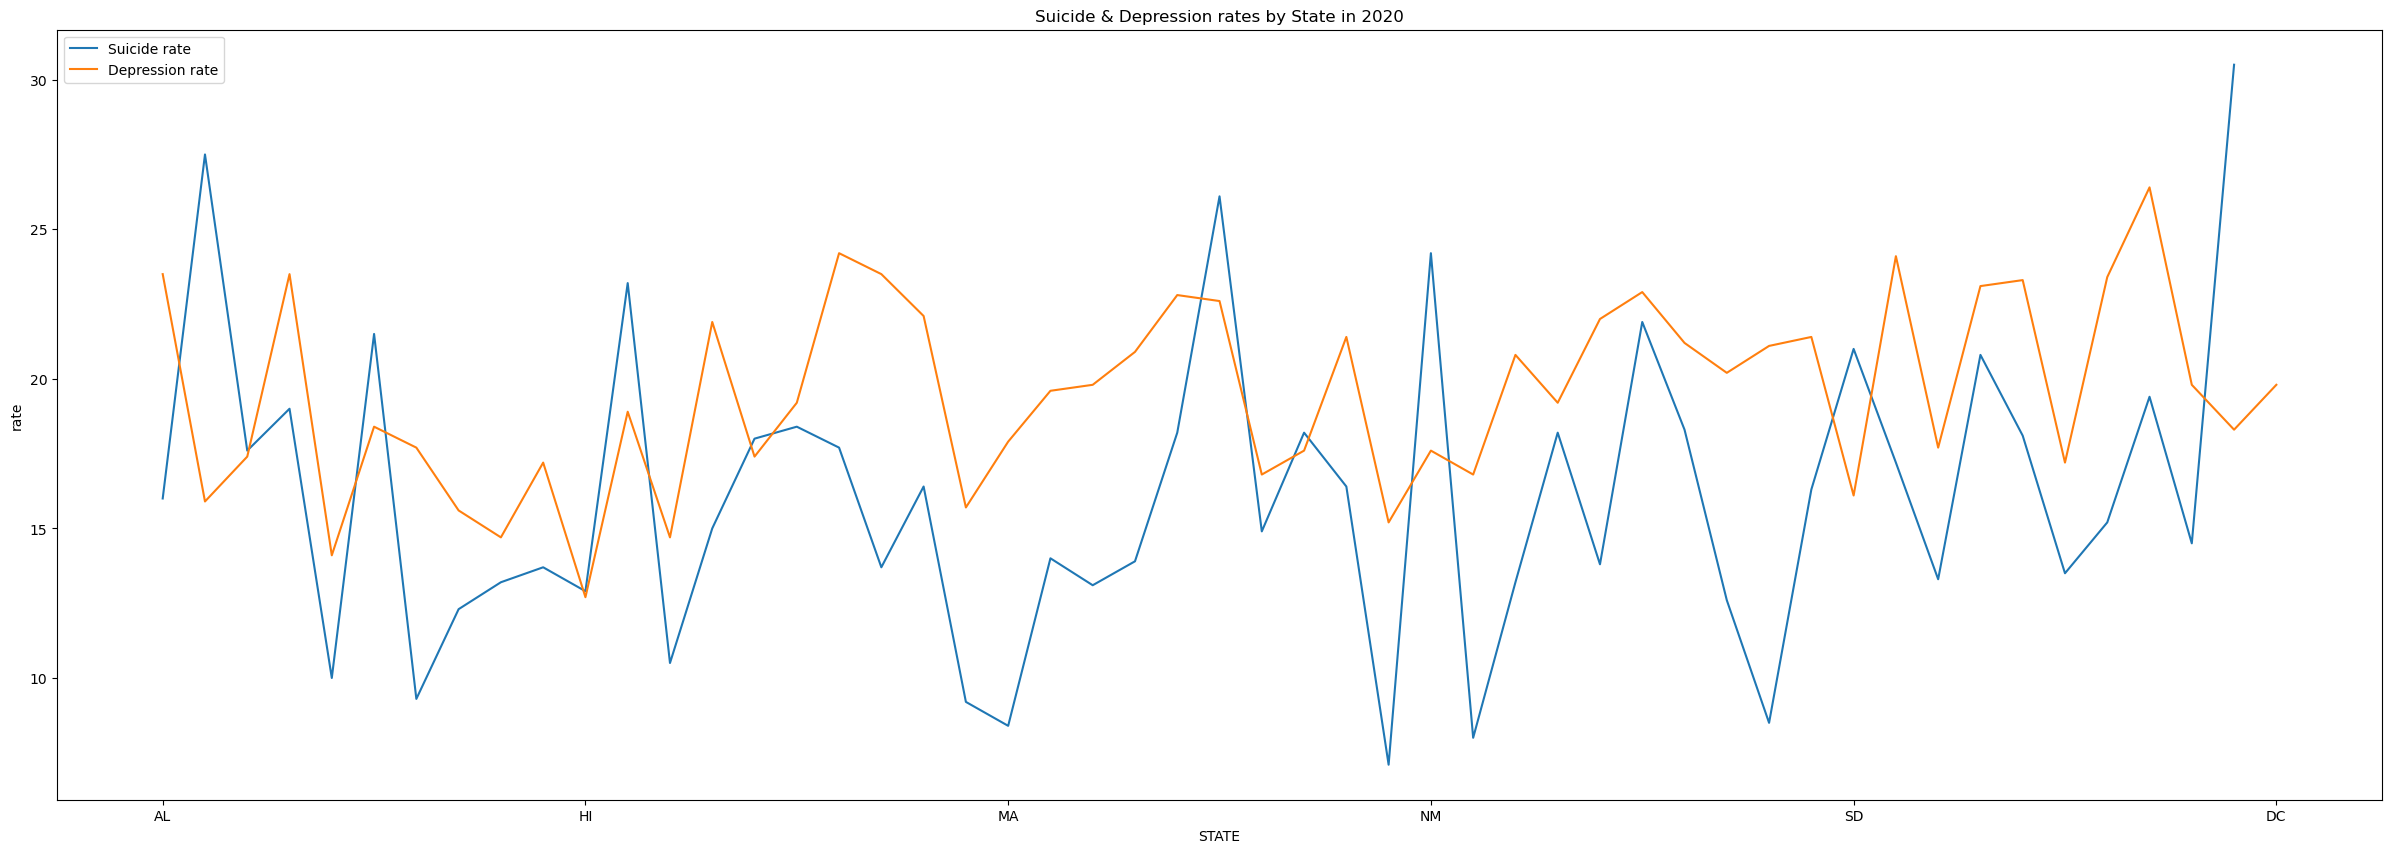

In [12]:
# Create line graphs for suicide and depression rate
suicide_depression_df.plot(kind="line", figsize=(30,10))
plt.xlabel('STATE')
plt.ylabel('rate')
plt.title('Suicide & Depression rates by State in 2020')
plt.legend()
plt.show()